In [151]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pdb
import math
from scipy.stats import gaussian_kde

In [3]:
asteroid_orbits_df = pd.read_csv("asteroid_orbit_20210207.csv")

/var/folders/8m/ydyhd4n94zvgdsd3fz_tnwh40000gn/T/ipykernel_34665/183586831.py:1: DtypeWarning: Columns (3,4,12) have mixed types. Specify dtype option on import or set low_memory=False.
  asteroid_orbits_df = pd.read_csv("asteroid_orbit_20210207.csv")


In [4]:
asteroid_orbits_df

,id,spkid,full_name,pdes,name,neo,pha,H,G,diameter,albedo,rot_per,spec_B,H_sigma,moid,class,first_obs,last_obs
0,a0000001,2000001,1 Ceres (A801 AA),1,Ceres,N,N,3.400,0.12,939.400,0.0900,9.074170,C,NaN,1.594780,MBA,1995-01-05,2020-04-25
1,a0000002,2000002,2 Pallas (A802 FA),2,Pallas,N,N,4.200,0.11,545.000,0.1010,7.813200,B,NaN,1.234290,MBA,1804-08-27,2020-09-13
2,a0000003,2000003,3 Juno (A804 RA),3,Juno,N,N,5.330,0.32,246.596,0.2140,7.210000,Sk,NaN,1.034290,MBA,1804-10-17,2020-09-12
3,a0000004,2000004,4 Vesta (A807 FA),4,Vesta,N,N,3.000,0.32,525.400,0.4228,5.342128,V,NaN,1.139480,MBA,1950-09-23,2020-03-11
4,a0000005,2000005,5 Astraea (A845 XA),5,Astraea,N,N,6.900,NaN,106.699,0.2740,16.806000,S,NaN,1.095750,MBA,1845-12-15,2020-06-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048318,bK21C02G,54110091,(2021 CG2),2021 CG2,NaN,Y,N,25.438,NaN,NaN,NaN,NaN,NaN,0.23688,0.016584,APO,2021-02-06,2021-02-07
1048319,bK21C02H,54110456,(2021 CH2),2021 CH2,NaN,Y,N,21.749,NaN,NaN,NaN,NaN,NaN,0.34744,0.053483,APO,2021-01-11,2021-02-07
1048320,bPLS4847,3246764,(4847 P-L),4847 P-L,NaN,N,N,16.827,NaN,NaN,NaN,NaN,NaN,0.00000,1.071900,MBA,1960-09-24,1960-09-28
1048321,bPLS6331,3246834,(6331 P-L),6331 P-L,NaN,N,N,18.500,NaN,NaN,NaN,NaN,NaN,NaN,0.671242,MBA,1960-09-24,2017-11-07


## Exploratory Data Analysis

In [32]:
asteroid_orbits_df1 = asteroid_orbits_df.copy()

In [33]:
asteroid_orbits_df1

,id,spkid,full_name,pdes,name,neo,pha,H,G,diameter,albedo,rot_per,spec_B,H_sigma,moid,class,first_obs,last_obs
0,a0000001,2000001,1 Ceres (A801 AA),1,Ceres,N,N,3.400,0.12,939.400,0.0900,9.074170,C,NaN,1.594780,MBA,1995-01-05,2020-04-25
1,a0000002,2000002,2 Pallas (A802 FA),2,Pallas,N,N,4.200,0.11,545.000,0.1010,7.813200,B,NaN,1.234290,MBA,1804-08-27,2020-09-13
2,a0000003,2000003,3 Juno (A804 RA),3,Juno,N,N,5.330,0.32,246.596,0.2140,7.210000,Sk,NaN,1.034290,MBA,1804-10-17,2020-09-12
3,a0000004,2000004,4 Vesta (A807 FA),4,Vesta,N,N,3.000,0.32,525.400,0.4228,5.342128,V,NaN,1.139480,MBA,1950-09-23,2020-03-11
4,a0000005,2000005,5 Astraea (A845 XA),5,Astraea,N,N,6.900,NaN,106.699,0.2740,16.806000,S,NaN,1.095750,MBA,1845-12-15,2020-06-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048318,bK21C02G,54110091,(2021 CG2),2021 CG2,NaN,Y,N,25.438,NaN,NaN,NaN,NaN,NaN,0.23688,0.016584,APO,2021-02-06,2021-02-07
1048319,bK21C02H,54110456,(2021 CH2),2021 CH2,NaN,Y,N,21.749,NaN,NaN,NaN,NaN,NaN,0.34744,0.053483,APO,2021-01-11,2021-02-07
1048320,bPLS4847,3246764,(4847 P-L),4847 P-L,NaN,N,N,16.827,NaN,NaN,NaN,NaN,NaN,0.00000,1.071900,MBA,1960-09-24,1960-09-28
1048321,bPLS6331,3246834,(6331 P-L),6331 P-L,NaN,N,N,18.500,NaN,NaN,NaN,NaN,NaN,NaN,0.671242,MBA,1960-09-24,2017-11-07


In [24]:
asteroid_orbits_df1["diameter"].describe()

count    140013.000000
mean          5.451230
std           9.309294
min           0.002500
25%           2.758000
50%           3.942000
75%           5.724000
max         939.400000
Name: diameter, dtype: float64

In [34]:
asteroid_orbits_df1["year_observed"] = asteroid_orbits_df1["first_obs"].map(lambda x: x[:4])

In [35]:
asteroid_orbits_df1

,id,spkid,full_name,pdes,name,neo,pha,H,G,diameter,albedo,rot_per,spec_B,H_sigma,moid,class,first_obs,last_obs,year_observed
0,a0000001,2000001,1 Ceres (A801 AA),1,Ceres,N,N,3.400,0.12,939.400,0.0900,9.074170,C,NaN,1.594780,MBA,1995-01-05,2020-04-25,1995
1,a0000002,2000002,2 Pallas (A802 FA),2,Pallas,N,N,4.200,0.11,545.000,0.1010,7.813200,B,NaN,1.234290,MBA,1804-08-27,2020-09-13,1804
2,a0000003,2000003,3 Juno (A804 RA),3,Juno,N,N,5.330,0.32,246.596,0.2140,7.210000,Sk,NaN,1.034290,MBA,1804-10-17,2020-09-12,1804
3,a0000004,2000004,4 Vesta (A807 FA),4,Vesta,N,N,3.000,0.32,525.400,0.4228,5.342128,V,NaN,1.139480,MBA,1950-09-23,2020-03-11,1950
4,a0000005,2000005,5 Astraea (A845 XA),5,Astraea,N,N,6.900,NaN,106.699,0.2740,16.806000,S,NaN,1.095750,MBA,1845-12-15,2020-06-19,1845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048318,bK21C02G,54110091,(2021 CG2),2021 CG2,NaN,Y,N,25.438,NaN,NaN,NaN,NaN,NaN,0.23688,0.016584,APO,2021-02-06,2021-02-07,2021
1048319,bK21C02H,54110456,(2021 CH2),2021 CH2,NaN,Y,N,21.749,NaN,NaN,NaN,NaN,NaN,0.34744,0.053483,APO,2021-01-11,2021-02-07,2021
1048320,bPLS4847,3246764,(4847 P-L),4847 P-L,NaN,N,N,16.827,NaN,NaN,NaN,NaN,NaN,0.00000,1.071900,MBA,1960-09-24,1960-09-28,1960
1048321,bPLS6331,3246834,(6331 P-L),6331 P-L,NaN,N,N,18.500,NaN,NaN,NaN,NaN,NaN,NaN,0.671242,MBA,1960-09-24,2017-11-07,1960


In [51]:
def convert_to_datetime(date):
    try: 
        datetime_date = pd.to_datetime(date, format='%Y-%m-%d')
        return datetime_date
    except:
        return None

In [52]:
asteroid_orbits_df1["first_obs"] = asteroid_orbits_df1["first_obs"].map(convert_to_datetime)

In [49]:
pd.to_datetime("1995-01-05", format='%Y-%m-%d')

Timestamp('1995-01-05 00:00:00')

In [54]:
asteroid_orbits_df1

,id,spkid,full_name,pdes,name,neo,pha,H,G,diameter,albedo,rot_per,spec_B,H_sigma,moid,class,first_obs,last_obs,year_observed
0,a0000001,2000001,1 Ceres (A801 AA),1,Ceres,N,N,3.400,0.12,939.400,0.0900,9.074170,C,NaN,1.594780,MBA,1995-01-05,2020-04-25,1995
1,a0000002,2000002,2 Pallas (A802 FA),2,Pallas,N,N,4.200,0.11,545.000,0.1010,7.813200,B,NaN,1.234290,MBA,1804-08-27,2020-09-13,1804
2,a0000003,2000003,3 Juno (A804 RA),3,Juno,N,N,5.330,0.32,246.596,0.2140,7.210000,Sk,NaN,1.034290,MBA,1804-10-17,2020-09-12,1804
3,a0000004,2000004,4 Vesta (A807 FA),4,Vesta,N,N,3.000,0.32,525.400,0.4228,5.342128,V,NaN,1.139480,MBA,1950-09-23,2020-03-11,1950
4,a0000005,2000005,5 Astraea (A845 XA),5,Astraea,N,N,6.900,NaN,106.699,0.2740,16.806000,S,NaN,1.095750,MBA,1845-12-15,2020-06-19,1845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048318,bK21C02G,54110091,(2021 CG2),2021 CG2,NaN,Y,N,25.438,NaN,NaN,NaN,NaN,NaN,0.23688,0.016584,APO,2021-02-06,2021-02-07,2021
1048319,bK21C02H,54110456,(2021 CH2),2021 CH2,NaN,Y,N,21.749,NaN,NaN,NaN,NaN,NaN,0.34744,0.053483,APO,2021-01-11,2021-02-07,2021
1048320,bPLS4847,3246764,(4847 P-L),4847 P-L,NaN,N,N,16.827,NaN,NaN,NaN,NaN,NaN,0.00000,1.071900,MBA,1960-09-24,1960-09-28,1960
1048321,bPLS6331,3246834,(6331 P-L),6331 P-L,NaN,N,N,18.500,NaN,NaN,NaN,NaN,NaN,NaN,0.671242,MBA,1960-09-24,2017-11-07,1960


In [56]:
asteroid_orbits_df2 = asteroid_orbits_df1.dropna(subset = ['diameter'])

In [58]:
asteroid_orbits_df2

,id,spkid,full_name,pdes,name,neo,pha,H,G,diameter,albedo,rot_per,spec_B,H_sigma,moid,class,first_obs,last_obs,year_observed
0,a0000001,2000001,1 Ceres (A801 AA),1,Ceres,N,N,3.40,0.12,939.400,0.0900,9.074170,C,NaN,1.594780,MBA,1995-01-05,2020-04-25,1995
1,a0000002,2000002,2 Pallas (A802 FA),2,Pallas,N,N,4.20,0.11,545.000,0.1010,7.813200,B,NaN,1.234290,MBA,1804-08-27,2020-09-13,1804
2,a0000003,2000003,3 Juno (A804 RA),3,Juno,N,N,5.33,0.32,246.596,0.2140,7.210000,Sk,NaN,1.034290,MBA,1804-10-17,2020-09-12,1804
3,a0000004,2000004,4 Vesta (A807 FA),4,Vesta,N,N,3.00,0.32,525.400,0.4228,5.342128,V,NaN,1.139480,MBA,1950-09-23,2020-03-11,1950
4,a0000005,2000005,5 Astraea (A845 XA),5,Astraea,N,N,6.90,NaN,106.699,0.2740,16.806000,S,NaN,1.095750,MBA,1845-12-15,2020-06-19,1845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010808,bK19A40R,3839175,(2019 AR40),2019 AR40,NaN,N,N,18.30,NaN,1.870,0.0730,NaN,NaN,0.32881,1.126060,MBA,2001-02-22,2019-02-05,2001
1011712,bK19B05Y,3839314,(2019 BY5),2019 BY5,NaN,N,N,17.10,NaN,2.182,0.0540,NaN,NaN,0.22774,0.980129,MBA,2010-01-09,2020-04-29,2010
1011735,bK19B06X,3839472,(2019 BX6),2019 BX6,NaN,N,N,17.40,NaN,1.688,NaN,NaN,NaN,0.27639,1.049430,MBA,2000-11-29,2020-04-22,2000
1011739,bK19B07B,3839444,(2019 BB7),2019 BB7,NaN,N,N,16.90,NaN,2.887,0.1110,NaN,NaN,0.43209,1.371600,MBA,2008-11-18,2019-03-05,2008


In [66]:
asteroid_orbits_df2['year_observed'] = asteroid_orbits_df2['year_observed'].astype('int')

/var/folders/8m/ydyhd4n94zvgdsd3fz_tnwh40000gn/T/ipykernel_34665/428363182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asteroid_orbits_df2['year_observed'] = asteroid_orbits_df2['year_observed'].astype('int')


Text(0, 0.5, 'Average asteroid diameter (km)')

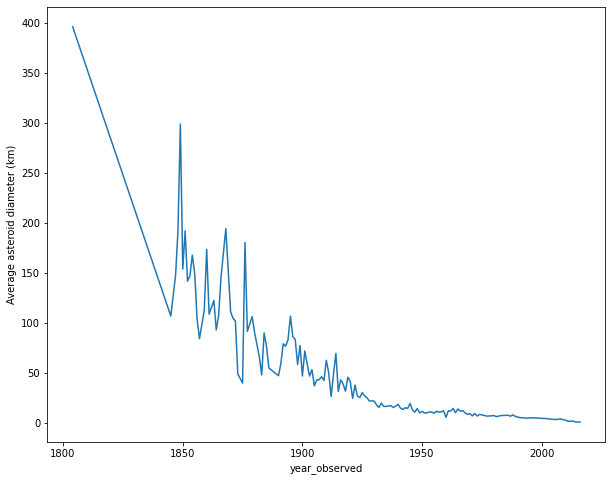

In [82]:
plt.figure(figsize = (10, 8))
asteroid_orbits_df2.groupby('year_observed')['diameter'].mean().plot()
plt.ylabel('Average asteroid diameter (km)')

#### average size of asteroids getting discovered is smaller each year

## Visualize the amount of asteroids in each orbital class

([<matplotlib.patches.Wedge at 0x2c8847280>,
 [Text(-1.0384384908703315, 0.3628298508653178, 'MBA'),
  Text(0.9208671642112802, -0.6016674046992035, 'OMB'),
  Text(1.0051899592227311, -0.44675848719168654, 'IMB'),
  Text(1.053668278815502, -0.3158847229892222, 'MCA'),
  Text(1.0802546910589779, -0.20748446314139402, 'APO'),
  Text(1.092089501571641, -0.13168341033328748, 'TJN'),
  Text(1.0977336684400514, -0.07057473466579516, 'AMO'),
  Text(1.0996283921819667, -0.028590192502031396, 'TNO'),
  Text(1.0999493268345477, -0.0105583330230418, 'ATE'),
  Text(1.0999972733503889, -0.0024492083843373922, 'CEN'),
  Text(1.099999920354585, -0.00041859276996735866, 'AST'),
  Text(1.099999995559709, -9.883643280150473e-05, 'IEO'),
  Text(1.0999999999560592, -9.83208618837134e-06, 'HYA')])

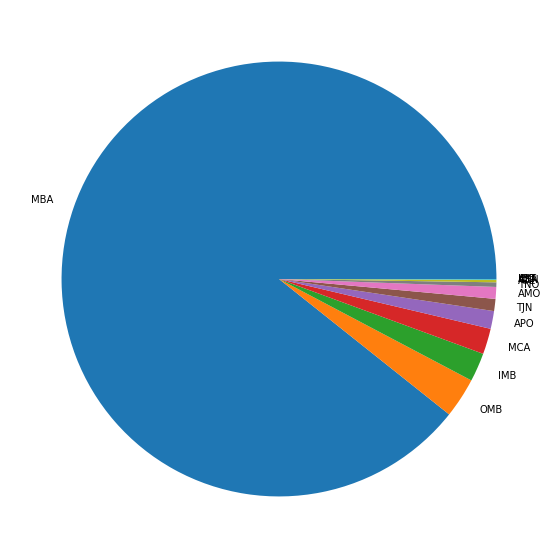

In [96]:
plt.figure(figsize = (10, 10))
plt.pie(asteroid_orbits_df1['class'].value_counts(), labels = asteroid_orbits_df1['class'].value_counts().index)


## Create Weighted Regression to Model Total Amount of Near Earth Asteroids

In [107]:
nea_df = asteroid_orbits_df1[asteroid_orbits_df1["neo"] == "Y"]

In [108]:
nea_df

,id,spkid,full_name,pdes,name,neo,pha,H,G,diameter,albedo,rot_per,spec_B,H_sigma,moid,class,first_obs,last_obs,year_observed
432,a0000433,2000433,433 Eros (A898 PA),433,Eros,Y,N,10.400,0.46,16.840,0.250,5.270,S,NaN,0.148623,AMO,1893-10-29,2020-09-03,1893
718,a0000719,2000719,719 Albert (A911 TB),719,Albert,Y,N,15.500,NaN,NaN,NaN,5.801,S,NaN,0.203482,AMO,1911-10-04,2020-12-23,1911
886,a0000887,2000887,887 Alinda (A918 AA),887,Alinda,Y,N,13.800,-0.12,4.200,0.310,73.970,NaN,NaN,0.082217,AMO,1918-02-03,2021-02-06,1918
1035,a0001036,2001036,1036 Ganymed (A924 UB),1036,Ganymed,Y,N,9.400,0.30,37.675,0.238,10.297,S,NaN,0.344956,AMO,1924-10-23,2021-02-06,1924
1220,a0001221,2001221,1221 Amor (1932 EA1),1221,Amor,Y,N,17.700,NaN,1.000,NaN,NaN,NaN,NaN,0.107450,AMO,1932-03-12,2020-09-14,1932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048316,bK21C02E,54110090,(2021 CE2),2021 CE2,NaN,Y,N,22.945,NaN,NaN,NaN,NaN,NaN,0.20847,0.211830,AMO,2021-02-06,2021-02-07,2021
1048317,bK21C02F,54110089,(2021 CF2),2021 CF2,NaN,Y,N,24.043,NaN,NaN,NaN,NaN,NaN,0.29938,0.108996,AMO,2021-02-06,2021-02-07,2021
1048318,bK21C02G,54110091,(2021 CG2),2021 CG2,NaN,Y,N,25.438,NaN,NaN,NaN,NaN,NaN,0.23688,0.016584,APO,2021-02-06,2021-02-07,2021
1048319,bK21C02H,54110456,(2021 CH2),2021 CH2,NaN,Y,N,21.749,NaN,NaN,NaN,NaN,NaN,0.34744,0.053483,APO,2021-01-11,2021-02-07,2021


In [109]:
nea_df = nea_df.dropna(subset = ['H'])

In [110]:
nea_df

,id,spkid,full_name,pdes,name,neo,pha,H,G,diameter,albedo,rot_per,spec_B,H_sigma,moid,class,first_obs,last_obs,year_observed
432,a0000433,2000433,433 Eros (A898 PA),433,Eros,Y,N,10.400,0.46,16.840,0.250,5.270,S,NaN,0.148623,AMO,1893-10-29,2020-09-03,1893
718,a0000719,2000719,719 Albert (A911 TB),719,Albert,Y,N,15.500,NaN,NaN,NaN,5.801,S,NaN,0.203482,AMO,1911-10-04,2020-12-23,1911
886,a0000887,2000887,887 Alinda (A918 AA),887,Alinda,Y,N,13.800,-0.12,4.200,0.310,73.970,NaN,NaN,0.082217,AMO,1918-02-03,2021-02-06,1918
1035,a0001036,2001036,1036 Ganymed (A924 UB),1036,Ganymed,Y,N,9.400,0.30,37.675,0.238,10.297,S,NaN,0.344956,AMO,1924-10-23,2021-02-06,1924
1220,a0001221,2001221,1221 Amor (1932 EA1),1221,Amor,Y,N,17.700,NaN,1.000,NaN,NaN,NaN,NaN,0.107450,AMO,1932-03-12,2020-09-14,1932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048316,bK21C02E,54110090,(2021 CE2),2021 CE2,NaN,Y,N,22.945,NaN,NaN,NaN,NaN,NaN,0.20847,0.211830,AMO,2021-02-06,2021-02-07,2021
1048317,bK21C02F,54110089,(2021 CF2),2021 CF2,NaN,Y,N,24.043,NaN,NaN,NaN,NaN,NaN,0.29938,0.108996,AMO,2021-02-06,2021-02-07,2021
1048318,bK21C02G,54110091,(2021 CG2),2021 CG2,NaN,Y,N,25.438,NaN,NaN,NaN,NaN,NaN,0.23688,0.016584,APO,2021-02-06,2021-02-07,2021
1048319,bK21C02H,54110456,(2021 CH2),2021 CH2,NaN,Y,N,21.749,NaN,NaN,NaN,NaN,NaN,0.34744,0.053483,APO,2021-01-11,2021-02-07,2021


### Calculate an estimated diameter, since the actual diameter of many asteroids is not known 

In [111]:
nea_df["albedo"].describe()

count    1204.000000
mean        0.172342
std         0.143932
min         0.009000
25%         0.047750
50%         0.137000
75%         0.253250
max         0.856000
Name: albedo, dtype: float64

#### Because the acutal albedo of many asteroids aren't known, use the median in the estimation equation

In [112]:
nea_df["estimated_diameter"] = (1329/np.sqrt(0.137))*(10**((-0.2)*(nea_df["H"])))

/var/folders/8m/ydyhd4n94zvgdsd3fz_tnwh40000gn/T/ipykernel_34665/553441268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nea_df["estimated_diameter"] = (1329/np.sqrt(0.137))*(10**((-0.2)*(nea_df["H"])))


In [113]:
nea_df

,id,spkid,full_name,pdes,name,neo,pha,H,G,diameter,albedo,rot_per,spec_B,H_sigma,moid,class,first_obs,last_obs,year_observed,estimated_diameter
432,a0000433,2000433,433 Eros (A898 PA),433,Eros,Y,N,10.400,0.46,16.840,0.250,5.270,S,NaN,0.148623,AMO,1893-10-29,2020-09-03,1893,29.865150
718,a0000719,2000719,719 Albert (A911 TB),719,Albert,Y,N,15.500,NaN,NaN,NaN,5.801,S,NaN,0.203482,AMO,1911-10-04,2020-12-23,1911,2.852100
886,a0000887,2000887,887 Alinda (A918 AA),887,Alinda,Y,N,13.800,-0.12,4.200,0.310,73.970,NaN,NaN,0.082217,AMO,1918-02-03,2021-02-06,1918,6.239714
1035,a0001036,2001036,1036 Ganymed (A924 UB),1036,Ganymed,Y,N,9.400,0.30,37.675,0.238,10.297,S,NaN,0.344956,AMO,1924-10-23,2021-02-06,1924,47.333073
1220,a0001221,2001221,1221 Amor (1932 EA1),1221,Amor,Y,N,17.700,NaN,1.000,NaN,NaN,NaN,NaN,0.107450,AMO,1932-03-12,2020-09-14,1932,1.035535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048316,bK21C02E,54110090,(2021 CE2),2021 CE2,NaN,Y,N,22.945,NaN,NaN,NaN,NaN,NaN,0.20847,0.211830,AMO,2021-02-06,2021-02-07,2021,0.092505
1048317,bK21C02F,54110089,(2021 CF2),2021 CF2,NaN,Y,N,24.043,NaN,NaN,NaN,NaN,NaN,0.29938,0.108996,AMO,2021-02-06,2021-02-07,2021,0.055791
1048318,bK21C02G,54110091,(2021 CG2),2021 CG2,NaN,Y,N,25.438,NaN,NaN,NaN,NaN,NaN,0.23688,0.016584,APO,2021-02-06,2021-02-07,2021,0.029347
1048319,bK21C02H,54110456,(2021 CH2),2021 CH2,NaN,Y,N,21.749,NaN,NaN,NaN,NaN,NaN,0.34744,0.053483,APO,2021-01-11,2021-02-07,2021,0.160459


### Arrange by largest to smallest diameter size, and then assign the value counts

In [114]:
nea_df.T

,432,718,886,1035,1220,1565,1579,1619,1626,1684,...,1048311,1048312,1048313,1048314,1048315,1048316,1048317,1048318,1048319,1048322
id,a0000433,a0000719,a0000887,a0001036,a0001221,a0001566,a0001580,a0001620,a0001627,a0001685,...,bK21C01Z,bK21C02A,bK21C02B,bK21C02C,bK21C02D,bK21C02E,bK21C02F,bK21C02G,bK21C02H,bPLS6344
spkid,2000433,2000719,2000887,2001036,2001221,2001566,2001580,2001620,2001627,2001685,...,54110084,54110085,54110086,54110087,54110088,54110090,54110089,54110091,54110456,3013075
full_name,433 Eros (A898 PA),719 Albert (A911 TB),887 Alinda (A918 AA),1036 Ganymed (A924 UB),1221 Amor (1932 EA1),1566 Icarus (1949 MA),1580 Betulia (1950 KA),1620 Geographos (1951 RA),1627 Ivar (1929 SH),1685 Toro (1948 OA),...,(2021 CZ1),(2021 CA2),(2021 CB2),(2021 CC2),(2021 CD2),(2021 CE2),(2021 CF2),(2021 CG2),(2021 CH2),(6344 P-L)
pdes,433,719,887,1036,1221,1566,1580,1620,1627,1685,...,2021 CZ1,2021 CA2,2021 CB2,2021 CC2,2021 CD2,2021 CE2,2021 CF2,2021 CG2,2021 CH2,6344 P-L
name,Eros,Albert,Alinda,Ganymed,Amor,Icarus,Betulia,Geographos,Ivar,Toro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neo,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,...,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
pha,N,N,N,N,N,Y,N,Y,N,N,...,N,N,N,N,N,N,N,N,N,Y
H,10.4,15.5,13.8,9.4,17.7,16.9,14.7,15.3,12.7,14.3,...,24.835,26.23,25.182,22.857,22.955,22.945,24.043,25.438,21.749,20.4
G,0.46,NaN,-0.12,0.3,NaN,NaN,0.0,NaN,0.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diameter,16.84,NaN,4.2,37.675,1.0,1.0,5.8,2.56,9.12,3.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
nea_df

,id,spkid,full_name,pdes,name,neo,pha,H,G,diameter,albedo,rot_per,spec_B,H_sigma,moid,class,first_obs,last_obs,year_observed,estimated_diameter
432,a0000433,2000433,433 Eros (A898 PA),433,Eros,Y,N,10.400,0.46,16.840,0.250,5.270,S,NaN,0.148623,AMO,1893-10-29,2020-09-03,1893,29.865150
718,a0000719,2000719,719 Albert (A911 TB),719,Albert,Y,N,15.500,NaN,NaN,NaN,5.801,S,NaN,0.203482,AMO,1911-10-04,2020-12-23,1911,2.852100
886,a0000887,2000887,887 Alinda (A918 AA),887,Alinda,Y,N,13.800,-0.12,4.200,0.310,73.970,NaN,NaN,0.082217,AMO,1918-02-03,2021-02-06,1918,6.239714
1035,a0001036,2001036,1036 Ganymed (A924 UB),1036,Ganymed,Y,N,9.400,0.30,37.675,0.238,10.297,S,NaN,0.344956,AMO,1924-10-23,2021-02-06,1924,47.333073
1220,a0001221,2001221,1221 Amor (1932 EA1),1221,Amor,Y,N,17.700,NaN,1.000,NaN,NaN,NaN,NaN,0.107450,AMO,1932-03-12,2020-09-14,1932,1.035535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048316,bK21C02E,54110090,(2021 CE2),2021 CE2,NaN,Y,N,22.945,NaN,NaN,NaN,NaN,NaN,0.20847,0.211830,AMO,2021-02-06,2021-02-07,2021,0.092505
1048317,bK21C02F,54110089,(2021 CF2),2021 CF2,NaN,Y,N,24.043,NaN,NaN,NaN,NaN,NaN,0.29938,0.108996,AMO,2021-02-06,2021-02-07,2021,0.055791
1048318,bK21C02G,54110091,(2021 CG2),2021 CG2,NaN,Y,N,25.438,NaN,NaN,NaN,NaN,NaN,0.23688,0.016584,APO,2021-02-06,2021-02-07,2021,0.029347
1048319,bK21C02H,54110456,(2021 CH2),2021 CH2,NaN,Y,N,21.749,NaN,NaN,NaN,NaN,NaN,0.34744,0.053483,APO,2021-01-11,2021-02-07,2021,0.160459


In [116]:
nea_df = nea_df.sort_values('estimated_diameter', ascending = False)
nea_df['asteroid_count'] = range(1, 24984)

In [117]:
nea_df

,id,spkid,full_name,pdes,name,neo,pha,H,G,diameter,...,rot_per,spec_B,H_sigma,moid,class,first_obs,last_obs,year_observed,estimated_diameter,asteroid_count
1035,a0001036,2001036,1036 Ganymed (A924 UB),1036,Ganymed,Y,N,9.400,0.30,37.675,...,10.297,S,NaN,0.344956,AMO,1924-10-23,2021-02-06,1924,47.333073,1
432,a0000433,2000433,433 Eros (A898 PA),433,Eros,Y,N,10.400,0.46,16.840,...,5.270,S,NaN,0.148623,AMO,1893-10-29,2020-09-03,1893,29.865150,2
1865,a0001866,2001866,1866 Sisyphus (1972 XA),1866,Sisyphus,Y,N,12.400,NaN,8.480,...,2.400,S,NaN,0.104589,APO,1955-01-26,2021-01-07,1955,11.889530,3
4953,a0004954,2004954,4954 Eric (1990 SQ),4954,Eric,Y,N,12.500,NaN,10.800,...,12.056,S,NaN,0.194663,AMO,1975-06-07,2020-08-16,1975,11.354413,4
1626,a0001627,2001627,1627 Ivar (1929 SH),1627,Ivar,Y,N,12.700,0.60,9.120,...,4.795,S,NaN,0.111952,AMO,1929-09-25,2020-06-22,1929,10.355348,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655779,bK08U01M,3432678,(2008 UM1),2008 UM1,NaN,Y,N,32.100,NaN,NaN,...,NaN,NaN,NaN,0.000012,APO,2008-10-22,2008-10-22,2008,0.001365,24979
1010156,bK19A05S,3837685,(2019 AS5),2019 AS5,NaN,Y,N,32.300,NaN,NaN,...,NaN,NaN,0.38061,0.000100,APO,2019-01-08,2019-01-11,2019,0.001245,24980
1033336,bK20C00W,3989456,(2020 CW),2020 CW,NaN,Y,N,32.516,NaN,NaN,...,NaN,NaN,0.19997,0.000076,APO,2020-02-01,2020-02-01,2020,0.001127,24981
1048182,bK21B00O,54106298,(2021 BO),2021 BO,NaN,Y,N,32.915,NaN,NaN,...,NaN,NaN,0.35204,0.000287,APO,2021-01-17,2021-01-18,2021,0.000938,24982


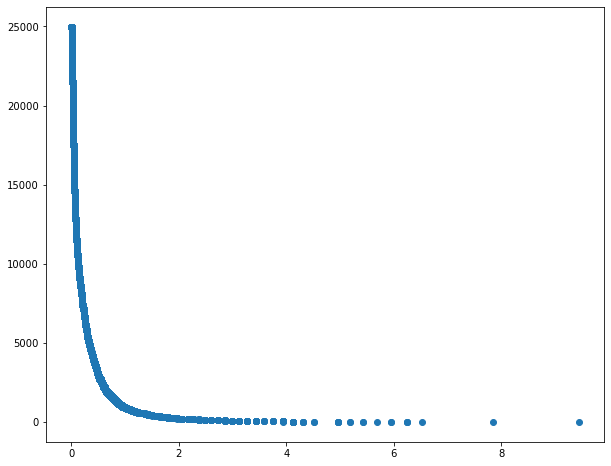

In [119]:
condition = nea_df["estimated_diameter"] < 10
plt.figure(figsize = (10, 8))
plt.scatter(nea_df["estimated_diameter"][condition], nea_df["asteroid_count"][condition])

#### Follows a power law relationship -> much less asteroids at a larger diameter

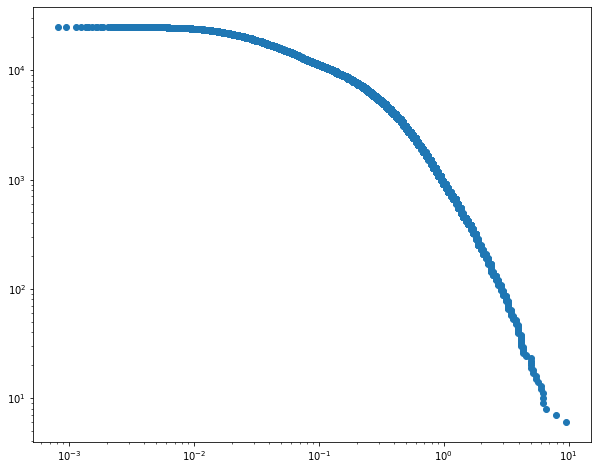

In [126]:
condition = nea_df["estimated_diameter"] < 10
plt.figure(figsize = (10, 8))
plt.scatter(nea_df["estimated_diameter"][condition],nea_df["asteroid_count"][condition])
plt.xscale('log')
plt.yscale('log')

#### Because this is an exponential function, we take the natural log of both sides of the exponential function to linearize. While larger asteroids closely follow this linear distribution, the smaller asteroids do not. Our hypothesized reason why is because they have not been discovered yet. 

## Weighted Regression to predict the amount of Near Earth Asteroids

### Design the weighting function -> larger asteroids get more weight since they have all mainly been discovered

In [252]:
def weighting_function(diameter, kde):
    if diameter > 1:
        weight_array = (1)**2/kde.evaluate(1)
        weight = weight_array[0]
        return weight
    else:
        weight_array = (diameter)**2/kde.evaluate(diameter)
        weight = weight_array[0]
        return weight

##### take inverse of the kernel density estimation to accoutn for the fact that more smaller asteroids exist

In [253]:
kde_nea = gaussian_kde(nea_df["estimated_diameter"])
nea_df["weight"] = nea_df["estimated_diameter"].map(lambda x: weighting_function(x, kde_nea))

In [254]:
nea_df.head(50)

,id,spkid,full_name,pdes,name,neo,pha,H,G,diameter,...,spec_B,H_sigma,moid,class,first_obs,last_obs,year_observed,estimated_diameter,asteroid_count,weight
1035,a0001036,2001036,1036 Ganymed (A924 UB),1036,Ganymed,Y,N,9.4,0.30,37.675,...,S,NaN,0.344956,AMO,1924-10-23,2021-02-06,1924,47.333073,1,14.283886
432,a0000433,2000433,433 Eros (A898 PA),433,Eros,Y,N,10.4,0.46,16.840,...,S,NaN,0.148623,AMO,1893-10-29,2020-09-03,1893,29.865150,2,14.283886
1865,a0001866,2001866,1866 Sisyphus (1972 XA),1866,Sisyphus,Y,N,12.4,NaN,8.480,...,S,NaN,0.104589,APO,1955-01-26,2021-01-07,1955,11.889530,3,14.283886
4953,a0004954,2004954,4954 Eric (1990 SQ),4954,Eric,Y,N,12.5,NaN,10.800,...,S,NaN,0.194663,AMO,1975-06-07,2020-08-16,1975,11.354413,4,14.283886
1626,a0001627,2001627,1627 Ivar (1929 SH),1627,Ivar,Y,N,12.7,0.60,9.120,...,S,NaN,0.111952,AMO,1929-09-25,2020-06-22,1929,10.355348,5,14.283886
3551,a0003552,2003552,3552 Don Quixote (1983 SA),3552,Don Quixote,Y,N,12.9,NaN,19.000,...,D,NaN,0.334156,AMO,1983-09-10,2021-01-18,1983,9.444190,6,14.283886
2211,a0002212,2002212,2212 Hephaistos (1978 SB),2212,Hephaistos,Y,N,13.3,NaN,5.700,...,NaN,NaN,0.115888,APO,1978-09-27,2021-01-18,1978,7.855335,7,14.283886
25915,a0025916,2025916,25916 (2001 CP44),25916,NaN,Y,N,13.7,NaN,5.683,...,NaN,NaN,0.280916,AMO,1973-04-10,2021-02-06,1973,6.533783,8,14.283886
886,a0000887,2000887,887 Alinda (A918 AA),887,Alinda,Y,N,13.8,-0.12,4.200,...,NaN,NaN,0.082217,AMO,1918-02-03,2021-02-06,1918,6.239714,9,14.283886
5586,a0005587,2005587,5587 (1990 SB),5587,NaN,Y,N,13.8,NaN,3.570,...,Sq,NaN,0.306480,AMO,1953-12-07,2021-01-30,1953,6.239714,10,14.283886


### Apply weighted regression using scikit library

In [192]:
nea_model = LinearRegression()
nea_model.fit(np.log(nea_df[["estimated_diameter"]]), np.log(nea_df["asteroid_count"]), sample_weight = nea_df["weight"])

LinearRegression()

#### Model has a slope of -1.958, when compared to literature's theoretical slope of -2.5

In [193]:
nea_model.coef_[0]

-1.9587534447552186

#### Model has an R^2 of 0.975

In [194]:
nea_model.score(np.log(nea_df[["estimated_diameter"]]), np.log(nea_df["asteroid_count"]), sample_weight = nea_df["weight"])

0.9751286794925716

In [197]:
y_pred_nea = nea_model.predict(np.log(nea_df[["estimated_diameter"]]))

In [202]:
y_pred_nea_list = list(y_pred_nea)

In [203]:
exp_y_pred_nea_list = [np.exp(x) for x in y_pred_nea_list]

In [204]:
exp_y_pred_nea_list

[0.45921453834049153,
 1.131791213297718,
 6.874920743841429,
 7.523895669431367,
 9.011413173098138,
 10.793021453794825,
 15.482579400370524,
 22.209745984012287,
 24.306289171111295,
 24.306289171111295,
 24.306289171111295,
 26.600740670107918,
 26.600740670107918,
 29.111782519206407,
 31.859860293210907,
 31.859860293210907,
 34.86734957686767,
 34.86734957686767,
 38.15873815286507,
 38.15873815286507,
 38.15873815286507,
 38.15873815286507,
 38.15873815286507,
 45.70294044036352,
 45.70294044036352,
 50.017181066060374,
 50.017181066060374,
 50.017181066060374,
 50.017181066060374,
 54.73867496686545,
 54.73867496686545,
 54.73867496686545,
 54.73867496686545,
 54.73867496686545,
 54.73867496686545,
 54.73867496686545,
 54.73867496686545,
 54.73867496686545,
 59.90586580980548,
 59.90586580980548,
 59.90586580980548,
 59.90586580980548,
 59.90586580980548,
 59.90586580980548,
 59.90586580980548,
 59.90586580980548,
 59.90586580980548,
 65.56082624569807,
 65.56082624569807,
 65

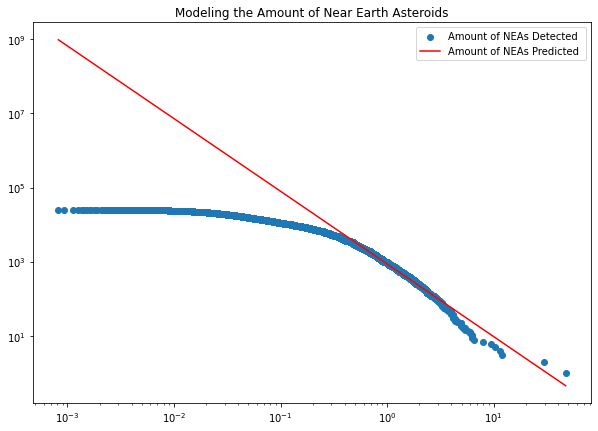

In [215]:
plt.figure(figsize = (10, 7))
plt.scatter(nea_df["estimated_diameter"], nea_df["asteroid_count"], label = "Amount of NEAs Detected")
plt.plot(nea_df["estimated_diameter"], exp_y_pred_nea_list, color = 'r', label = "Amount of NEAs Predicted ")
plt.xscale('log')
plt.yscale('log')
plt.title("Modeling the Amount of Near Earth Asteroids")
plt.legend()
plt.show()

## General Function for the weighted regression that can be applied to any asteroid class

In [226]:
def weighted_regression_asteroids(diameter, amount, weight, asteroid_class):
    model = LinearRegression()
    model.fit(np.log(diameter), np.log(amount), sample_weight = weight)
    slope = model.coef_[0]
    r_squared = model.score(np.log(diameter), np.log(amount), sample_weight = weight)
    y_pred = list(model.predict(np.log(diameter)))
    exp_y_pred = [np.exp(x) for x in y_pred]
    
    plt.figure(figsize = (10, 7))
    plt.scatter(diameter, amount, label = "Amount of " + asteroid_class + " Detected")
    plt.plot(diameter, exp_y_pred, color = 'r', label = "Amount of " + asteroid_class + " Predicted" )
    plt.xscale('log')
    plt.yscale('log')
    plt.title("Modeling the Amount of " + asteroid_class)
    plt.legend()
    plt.show()


## Modeling Amount of Main Belt Asteroids

In [217]:
asteroid_orbits_df1

,id,spkid,full_name,pdes,name,neo,pha,H,G,diameter,albedo,rot_per,spec_B,H_sigma,moid,class,first_obs,last_obs,year_observed
0,a0000001,2000001,1 Ceres (A801 AA),1,Ceres,N,N,3.400,0.12,939.400,0.0900,9.074170,C,NaN,1.594780,MBA,1995-01-05,2020-04-25,1995
1,a0000002,2000002,2 Pallas (A802 FA),2,Pallas,N,N,4.200,0.11,545.000,0.1010,7.813200,B,NaN,1.234290,MBA,1804-08-27,2020-09-13,1804
2,a0000003,2000003,3 Juno (A804 RA),3,Juno,N,N,5.330,0.32,246.596,0.2140,7.210000,Sk,NaN,1.034290,MBA,1804-10-17,2020-09-12,1804
3,a0000004,2000004,4 Vesta (A807 FA),4,Vesta,N,N,3.000,0.32,525.400,0.4228,5.342128,V,NaN,1.139480,MBA,1950-09-23,2020-03-11,1950
4,a0000005,2000005,5 Astraea (A845 XA),5,Astraea,N,N,6.900,NaN,106.699,0.2740,16.806000,S,NaN,1.095750,MBA,1845-12-15,2020-06-19,1845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048318,bK21C02G,54110091,(2021 CG2),2021 CG2,NaN,Y,N,25.438,NaN,NaN,NaN,NaN,NaN,0.23688,0.016584,APO,2021-02-06,2021-02-07,2021
1048319,bK21C02H,54110456,(2021 CH2),2021 CH2,NaN,Y,N,21.749,NaN,NaN,NaN,NaN,NaN,0.34744,0.053483,APO,2021-01-11,2021-02-07,2021
1048320,bPLS4847,3246764,(4847 P-L),4847 P-L,NaN,N,N,16.827,NaN,NaN,NaN,NaN,NaN,0.00000,1.071900,MBA,1960-09-24,1960-09-28,1960
1048321,bPLS6331,3246834,(6331 P-L),6331 P-L,NaN,N,N,18.500,NaN,NaN,NaN,NaN,NaN,NaN,0.671242,MBA,1960-09-24,2017-11-07,1960


In [218]:
mba_df = asteroid_orbits_df1[asteroid_orbits_df1["class"] == "MBA"]

In [219]:
mba_df

,id,spkid,full_name,pdes,name,neo,pha,H,G,diameter,albedo,rot_per,spec_B,H_sigma,moid,class,first_obs,last_obs,year_observed
0,a0000001,2000001,1 Ceres (A801 AA),1,Ceres,N,N,3.400,0.12,939.400,0.0900,9.074170,C,NaN,1.594780,MBA,1995-01-05,2020-04-25,1995
1,a0000002,2000002,2 Pallas (A802 FA),2,Pallas,N,N,4.200,0.11,545.000,0.1010,7.813200,B,NaN,1.234290,MBA,1804-08-27,2020-09-13,1804
2,a0000003,2000003,3 Juno (A804 RA),3,Juno,N,N,5.330,0.32,246.596,0.2140,7.210000,Sk,NaN,1.034290,MBA,1804-10-17,2020-09-12,1804
3,a0000004,2000004,4 Vesta (A807 FA),4,Vesta,N,N,3.000,0.32,525.400,0.4228,5.342128,V,NaN,1.139480,MBA,1950-09-23,2020-03-11,1950
4,a0000005,2000005,5 Astraea (A845 XA),5,Astraea,N,N,6.900,NaN,106.699,0.2740,16.806000,S,NaN,1.095750,MBA,1845-12-15,2020-06-19,1845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048258,bK21B03P,54109625,(2021 BP3),2021 BP3,NaN,N,NaN,17.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MBA,NaT,2021-02-01,2018
1048259,bK21B03Q,54109626,(2021 BQ3),2021 BQ3,NaN,N,NaN,18.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MBA,NaT,2021-01-24,2019
1048260,bK21B03R,54109627,(2021 BR3),2021 BR3,NaN,N,NaN,17.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MBA,NaT,2021-01-24,2014
1048320,bPLS4847,3246764,(4847 P-L),4847 P-L,NaN,N,N,16.827,NaN,NaN,NaN,NaN,NaN,0.0,1.071900,MBA,1960-09-24,1960-09-28,1960


In [220]:
mba_df = mba_df.dropna(subset = ['H'])

In [221]:
mba_df

,id,spkid,full_name,pdes,name,neo,pha,H,G,diameter,albedo,rot_per,spec_B,H_sigma,moid,class,first_obs,last_obs,year_observed
0,a0000001,2000001,1 Ceres (A801 AA),1,Ceres,N,N,3.400,0.12,939.400,0.0900,9.074170,C,NaN,1.594780,MBA,1995-01-05,2020-04-25,1995
1,a0000002,2000002,2 Pallas (A802 FA),2,Pallas,N,N,4.200,0.11,545.000,0.1010,7.813200,B,NaN,1.234290,MBA,1804-08-27,2020-09-13,1804
2,a0000003,2000003,3 Juno (A804 RA),3,Juno,N,N,5.330,0.32,246.596,0.2140,7.210000,Sk,NaN,1.034290,MBA,1804-10-17,2020-09-12,1804
3,a0000004,2000004,4 Vesta (A807 FA),4,Vesta,N,N,3.000,0.32,525.400,0.4228,5.342128,V,NaN,1.139480,MBA,1950-09-23,2020-03-11,1950
4,a0000005,2000005,5 Astraea (A845 XA),5,Astraea,N,N,6.900,NaN,106.699,0.2740,16.806000,S,NaN,1.095750,MBA,1845-12-15,2020-06-19,1845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048258,bK21B03P,54109625,(2021 BP3),2021 BP3,NaN,N,NaN,17.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MBA,NaT,2021-02-01,2018
1048259,bK21B03Q,54109626,(2021 BQ3),2021 BQ3,NaN,N,NaN,18.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MBA,NaT,2021-01-24,2019
1048260,bK21B03R,54109627,(2021 BR3),2021 BR3,NaN,N,NaN,17.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MBA,NaT,2021-01-24,2014
1048320,bPLS4847,3246764,(4847 P-L),4847 P-L,NaN,N,N,16.827,NaN,NaN,NaN,NaN,NaN,0.0,1.071900,MBA,1960-09-24,1960-09-28,1960


In [224]:
mba_df["estimated_diameter"] = (1329/np.sqrt(0.081))*(10**((-0.2)*(mba_df["H"])))

/var/folders/8m/ydyhd4n94zvgdsd3fz_tnwh40000gn/T/ipykernel_34665/3830832152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mba_df["estimated_diameter"] = (1329/np.sqrt(0.081))*(10**((-0.2)*(mba_df["H"])))


In [225]:
mba_df

,id,spkid,full_name,pdes,name,neo,pha,H,G,diameter,albedo,rot_per,spec_B,H_sigma,moid,class,first_obs,last_obs,year_observed,estimated_diameter
0,a0000001,2000001,1 Ceres (A801 AA),1,Ceres,N,N,3.400,0.12,939.400,0.0900,9.074170,C,NaN,1.594780,MBA,1995-01-05,2020-04-25,1995,975.623992
1,a0000002,2000002,2 Pallas (A802 FA),2,Pallas,N,N,4.200,0.11,545.000,0.1010,7.813200,B,NaN,1.234290,MBA,1804-08-27,2020-09-13,1804,674.966893
2,a0000003,2000003,3 Juno (A804 RA),3,Juno,N,N,5.330,0.32,246.596,0.2140,7.210000,Sk,NaN,1.034290,MBA,1804-10-17,2020-09-12,1804,401.127532
3,a0000004,2000004,4 Vesta (A807 FA),4,Vesta,N,N,3.000,0.32,525.400,0.4228,5.342128,V,NaN,1.139480,MBA,1950-09-23,2020-03-11,1950,1172.958027
4,a0000005,2000005,5 Astraea (A845 XA),5,Astraea,N,N,6.900,NaN,106.699,0.2740,16.806000,S,NaN,1.095750,MBA,1845-12-15,2020-06-19,1845,194.662578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048258,bK21B03P,54109625,(2021 BP3),2021 BP3,NaN,N,NaN,17.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MBA,NaT,2021-02-01,2018,1.410206
1048259,bK21B03Q,54109626,(2021 BQ3),2021 BQ3,NaN,N,NaN,18.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MBA,NaT,2021-01-24,2019,1.172958
1048260,bK21B03R,54109627,(2021 BR3),2021 BR3,NaN,N,NaN,17.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MBA,NaT,2021-01-24,2014,1.410206
1048320,bPLS4847,3246764,(4847 P-L),4847 P-L,NaN,N,N,16.827,NaN,NaN,NaN,NaN,NaN,0.0,1.071900,MBA,1960-09-24,1960-09-28,1960,2.013179


In [229]:
mba_df = mba_df.sort_values('estimated_diameter', ascending = False)
mba_df['asteroid_count'] = range(1, 932915)

In [230]:
mba_df

,id,spkid,full_name,pdes,name,neo,pha,H,G,diameter,...,rot_per,spec_B,H_sigma,moid,class,first_obs,last_obs,year_observed,estimated_diameter,asteroid_count
3,a0000004,2000004,4 Vesta (A807 FA),4,Vesta,N,N,3.000,0.32,525.400,...,5.342128,V,NaN,1.139480,MBA,1950-09-23,2020-03-11,1950,1.172958e+03,1
0,a0000001,2000001,1 Ceres (A801 AA),1,Ceres,N,N,3.400,0.12,939.400,...,9.074170,C,NaN,1.594780,MBA,1995-01-05,2020-04-25,1995,9.756240e+02,2
1,a0000002,2000002,2 Pallas (A802 FA),2,Pallas,N,N,4.200,0.11,545.000,...,7.813200,B,NaN,1.234290,MBA,1804-08-27,2020-09-13,1804,6.749669e+02,3
14,a0000015,2000015,15 Eunomia (A851 OA),15,Eunomia,N,N,5.200,0.23,231.689,...,6.083000,S,NaN,1.194900,MBA,1851-09-02,2020-11-11,1851,4.258753e+02,4
2,a0000003,2000003,3 Juno (A804 RA),3,Juno,N,N,5.330,0.32,246.596,...,7.210000,Sk,NaN,1.034290,MBA,1804-10-17,2020-09-12,1804,4.011275e+02,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670227,bK09K32H,3466975,(2009 KH32),2009 KH32,NaN,N,N,22.579,NaN,NaN,...,NaN,NaN,0.17908,0.716006,MBA,2009-05-25,2009-05-27,2009,1.423910e-01,932910
670243,bK09K33D,3466993,(2009 KD33),2009 KD33,NaN,N,N,22.603,NaN,NaN,...,NaN,NaN,0.31390,0.930451,MBA,2009-05-25,2009-05-27,2009,1.408259e-01,932911
670221,bK09K31V,3466969,(2009 KV31),2009 KV31,NaN,N,N,22.754,NaN,NaN,...,NaN,NaN,0.38778,1.040240,MBA,2009-05-25,2009-05-27,2009,1.313658e-01,932912
670270,bK09K34N,3467021,(2009 KN34),2009 KN34,NaN,N,N,23.188,NaN,NaN,...,NaN,NaN,0.43654,0.860867,MBA,2009-05-25,2009-05-27,2009,1.075678e-01,932913


In [232]:
mba_df.reset_index(drop = True, inplace = True)

In [234]:
mba_df = mba_df.drop(932913)

In [235]:
mba_df

,id,spkid,full_name,pdes,name,neo,pha,H,G,diameter,...,rot_per,spec_B,H_sigma,moid,class,first_obs,last_obs,year_observed,estimated_diameter,asteroid_count
0,a0000004,2000004,4 Vesta (A807 FA),4,Vesta,N,N,3.000,0.32,525.400,...,5.342128,V,NaN,1.139480,MBA,1950-09-23,2020-03-11,1950,1172.958027,1
1,a0000001,2000001,1 Ceres (A801 AA),1,Ceres,N,N,3.400,0.12,939.400,...,9.074170,C,NaN,1.594780,MBA,1995-01-05,2020-04-25,1995,975.623992,2
2,a0000002,2000002,2 Pallas (A802 FA),2,Pallas,N,N,4.200,0.11,545.000,...,7.813200,B,NaN,1.234290,MBA,1804-08-27,2020-09-13,1804,674.966893,3
3,a0000015,2000015,15 Eunomia (A851 OA),15,Eunomia,N,N,5.200,0.23,231.689,...,6.083000,S,NaN,1.194900,MBA,1851-09-02,2020-11-11,1851,425.875319,4
4,a0000003,2000003,3 Juno (A804 RA),3,Juno,N,N,5.330,0.32,246.596,...,7.210000,Sk,NaN,1.034290,MBA,1804-10-17,2020-09-12,1804,401.127532,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932908,bK13HA0N,3642465,(2013 HN100),2013 HN100,NaN,N,N,22.494,NaN,NaN,...,NaN,NaN,0.33597,0.763641,MBA,2013-04-16,2013-04-19,2013,0.148075,932909
932909,bK09K32H,3466975,(2009 KH32),2009 KH32,NaN,N,N,22.579,NaN,NaN,...,NaN,NaN,0.17908,0.716006,MBA,2009-05-25,2009-05-27,2009,0.142391,932910
932910,bK09K33D,3466993,(2009 KD33),2009 KD33,NaN,N,N,22.603,NaN,NaN,...,NaN,NaN,0.31390,0.930451,MBA,2009-05-25,2009-05-27,2009,0.140826,932911
932911,bK09K31V,3466969,(2009 KV31),2009 KV31,NaN,N,N,22.754,NaN,NaN,...,NaN,NaN,0.38778,1.040240,MBA,2009-05-25,2009-05-27,2009,0.131366,932912


Text(0.5, 1.0, 'Distribution of Main Belt Asteroids Smaller than 100 Km')

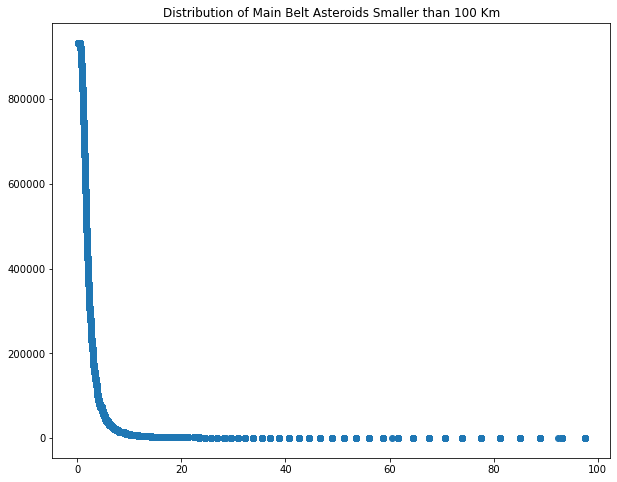

In [276]:
plt.figure(figsize = (10, 8))
condition = mba_df["estimated_diameter"] < 100
plt.scatter(mba_df[condition]["estimated_diameter"], mba_df[condition]["asteroid_count"])
plt.title("Distribution of Main Belt Asteroids Smaller than 100 Km")

Text(0, 0.5, 'Cumulative Amount of Main Belt Asteroids')

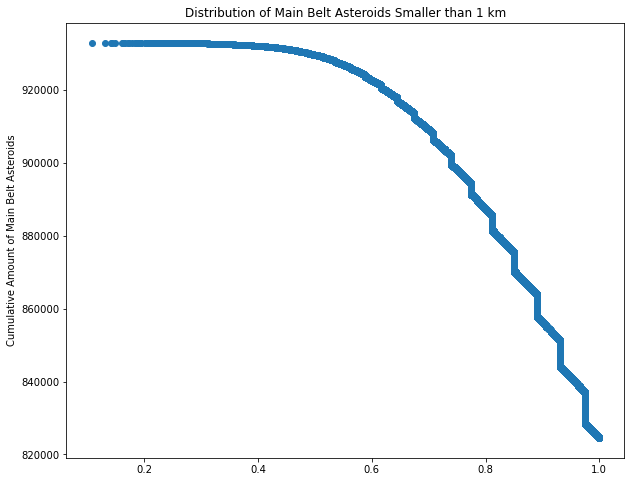

In [293]:
plt.figure(figsize = (10, 8))
condition = mba_df["estimated_diameter"] < 1
plt.scatter(mba_df[condition]["estimated_diameter"], mba_df[condition]["asteroid_count"])
plt.title("Distribution of Main Belt Asteroids Smaller than 1 km")
plt.ylabel("Cumulative Amount of Main Belt Asteroids")

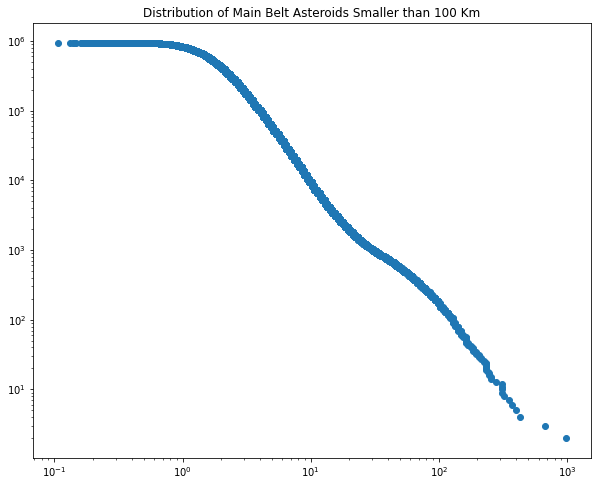

In [278]:
plt.figure(figsize = (10, 8))
condition = mba_df["estimated_diameter"] < 1000
plt.scatter(mba_df[condition]["estimated_diameter"], mba_df[condition]["asteroid_count"])
plt.title("Distribution of Main Belt Asteroids Smaller than 100 Km")
plt.xscale('log')
plt.yscale('log')

In [279]:
condition_mba = (mba_df["estimated_diameter"] > 50) & (mba_df["estimated_diameter"] < 500)

In [280]:
mba_model = LinearRegression()
mba_model.fit(np.log(mba_df[condition_mba][["estimated_diameter"]]),\
              np.log(mba_df[condition_mba]["asteroid_count"]))

LinearRegression()

In [282]:
mba_model.score(np.log(mba_df[condition_mba][["estimated_diameter"]]),\
              np.log(mba_df[condition_mba]["asteroid_count"]))

0.984886423817415

In [283]:
mba_model.coef_[0]

-2.1252834018714837

In [287]:
y_pred_mba = list(mba_model.predict(np.log(mba_df[["estimated_diameter"]])))

In [288]:
exp_y_pred_mba = [np.exp(x) for x in y_pred_mba]

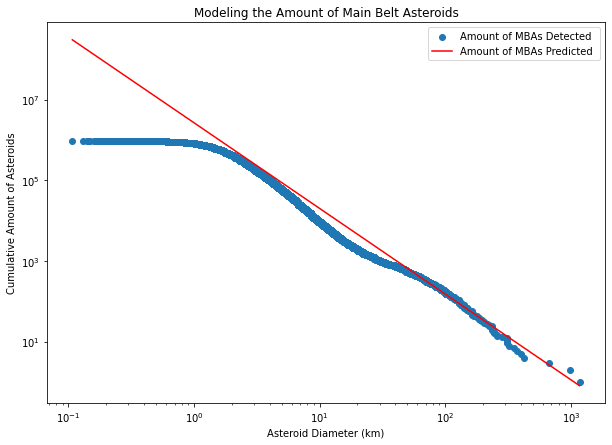

In [292]:
plt.figure(figsize = (10, 7))
plt.scatter(mba_df["estimated_diameter"], mba_df["asteroid_count"], label = "Amount of MBAs Detected")
plt.plot(mba_df["estimated_diameter"], exp_y_pred_mba, color = 'r', label = "Amount of MBAs Predicted ")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Asteroid Diameter (km)")
plt.ylabel("Cumulative Amount of Asteroids")
plt.title("Modeling the Amount of Main Belt Asteroids")
plt.legend()
plt.show()
